In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
retail = pd.read_csv('/content/final_exam_retail_hourly_sales.csv.csv')
retail.head()

,Hour,Footfall,Discount,Promo,Temperature,Units,PricePerUnit,Sales
0,23,33,0,0,21.7,33,149,4917.00
1,18,214,0,0,28.5,239,149,35611.00
2,12,179,5,0,35.4,196,149,27355.39
3,4,5,0,0,26.1,8,249,1992.00
4,13,161,0,0,35.8,206,199,40256.11


In [ ]:
retail.isnull().sum()

,0
Hour,0
Footfall,0
Discount,0
Promo,0
Temperature,0
Units,0
PricePerUnit,0
Sales,0


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hour          1000 non-null   int64  
 1   Footfall      1000 non-null   int64  
 2   Discount      1000 non-null   int64  
 3   Promo         1000 non-null   int64  
 4   Temperature   1000 non-null   float64
 5   Units         1000 non-null   int64  
 6   PricePerUnit  1000 non-null   int64  
 7   Sales         1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


## Feature Engineering

In [ ]:
retail['RevenuePerVisitor'] = retail['Sales']/retail['Footfall']
retail['DiscountImpact'] = retail['Discount'] * retail['Units']
retail['SalesPerUnitTemp'] = retail['Sales']/retail['Temperature']
retail.head()

,Hour,Footfall,Discount,Promo,Temperature,Units,PricePerUnit,Sales,RevenuePerVisitor,DiscountImpact,SalesPerUnitTemp
0,23,33,0,0,21.7,33,149,4917.00,149.000000,0,226.589862
1,18,214,0,0,28.5,239,149,35611.00,166.406542,0,1249.508772
2,12,179,5,0,35.4,196,149,27355.39,152.823408,980,772.751130
3,4,5,0,0,26.1,8,249,1992.00,398.400000,0,76.321839
4,13,161,0,0,35.8,206,199,40256.11,250.037950,0,1124.472346


## Descriptive Analysis

In [ ]:
retail.describe()

,Hour,Footfall,Discount,Promo,Temperature,Units,PricePerUnit,Sales,RevenuePerVisitor,DiscountImpact,SalesPerUnitTemp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,11.294000,121.363000,6.410000,0.313000,27.979100,136.919000,190.750000,24293.505690,213.364935,801.575000,847.313514
std,6.978701,82.669483,6.123675,0.463946,4.668759,96.156729,59.270148,19652.835966,146.780920,1017.612588,689.159815
min,0.000000,5.000000,0.000000,0.000000,17.100000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,36.000000,0.000000,0.000000,24.100000,40.750000,149.000000,7096.750000,129.029126,0.000000,289.352669
50%,11.000000,129.000000,5.000000,0.000000,28.000000,145.000000,199.000000,21191.525000,189.011607,300.000000,710.917161
75%,17.000000,196.250000,10.000000,1.000000,31.900000,214.250000,249.000000,36896.400000,261.861111,1332.500000,1255.329514
max,23.000000,283.000000,20.000000,1.000000,39.000000,367.000000,299.000000,103454.000000,1643.400000,5180.000000,3722.957198


<Axes: >

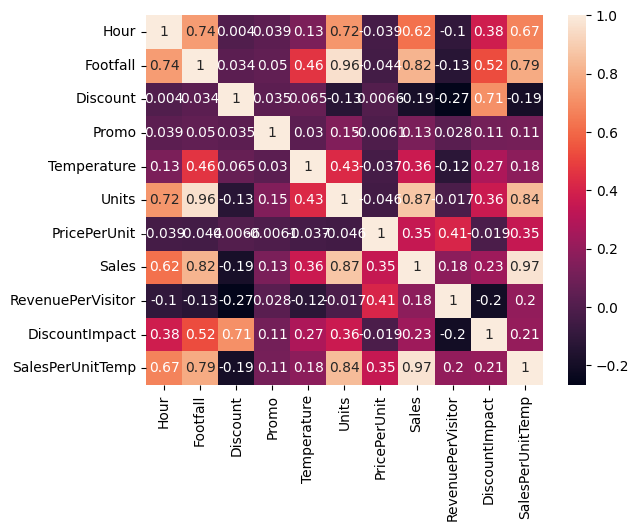

In [ ]:
retailcorr = retail.corr()
sns.heatmap(retailcorr, annot=True)

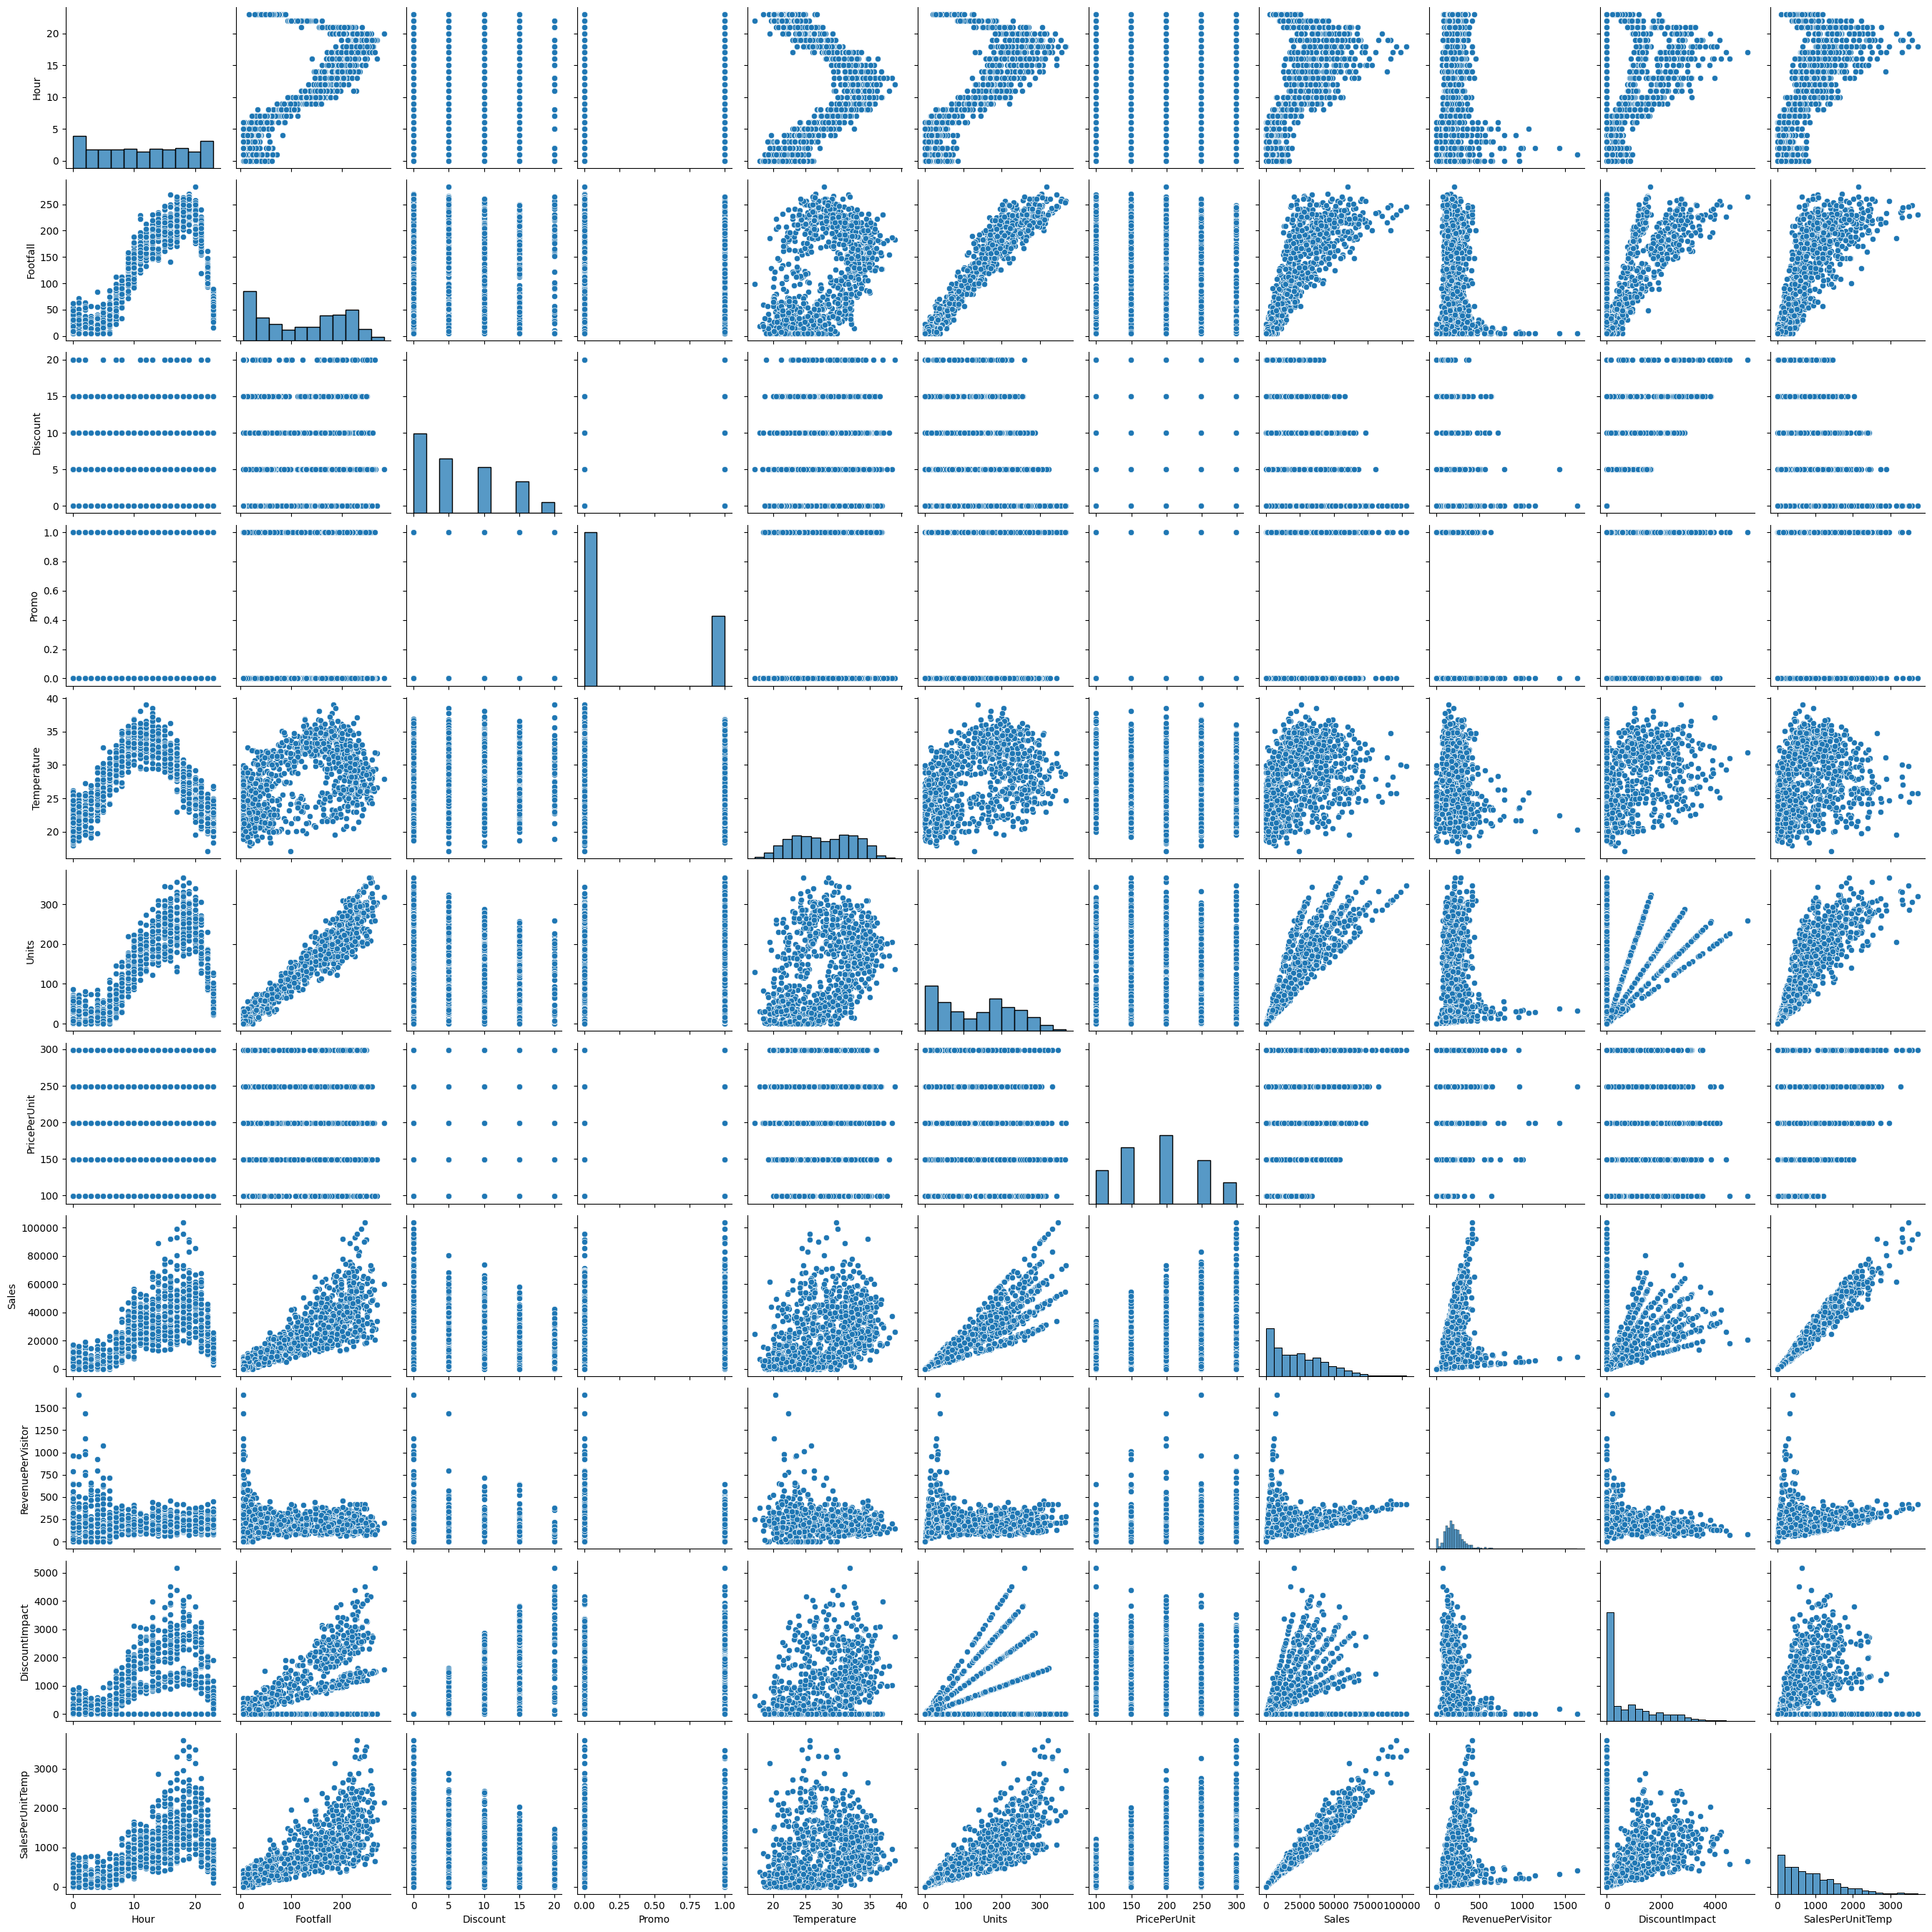

In [ ]:
sns.pairplot(retail)

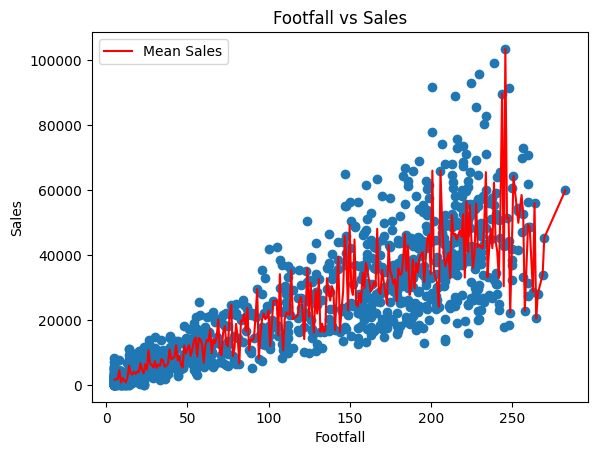

In [ ]:
plt.scatter(retail['Footfall'], retail['Sales'])
plt.xlabel('Footfall')
plt.ylabel('Sales')
plt.title('Footfall vs Sales')
mean_sales = retail.groupby('Footfall')['Sales'].mean()
plt.plot(mean_sales.index, mean_sales.values, color='red', label='Mean Sales')
plt.legend()
plt.show()

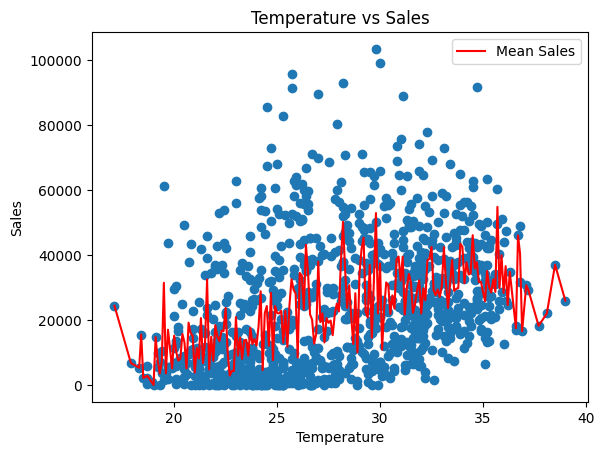

In [ ]:
plt.scatter(retail['Temperature'], retail['Sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Temperature vs Sales')
mean_sales = retail.groupby('Temperature')['Sales'].mean()
plt.plot(mean_sales.index, mean_sales.values, color='red', label='Mean Sales')
plt.legend()
plt.show()

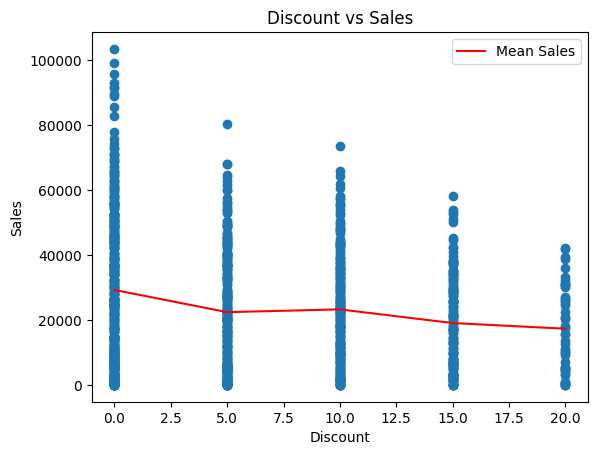

In [ ]:
plt.scatter(retail['Discount'], retail['Sales'])
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Discount vs Sales')
mean_sales = retail.groupby('Discount')['Sales'].mean()
plt.plot(mean_sales.index, mean_sales.values, color='red', label='Mean Sales')
plt.legend()
plt.show()

In [ ]:
X = retail[['Footfall', 'Temperature', 'Discount','Promo','PricePerUnit']]
y = retail['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Multiple Linear Regression

In [ ]:
retailreg = LinearRegression()
retailreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = retailreg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 5165.897139558365
Mean Squared Error: 43766570.21046366
Root Mean Squared Error: 6615.63074925314
R-squared: 0.8713997281232004


In [ ]:
retailfeature = pd.DataFrame({'Features': X.columns, 'Coefficients': retailreg.coef_})

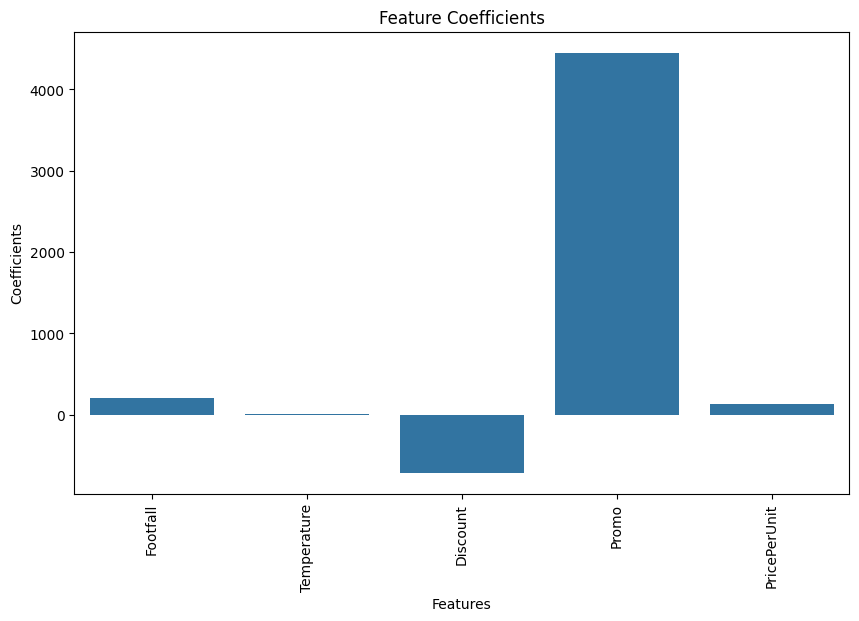

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Features', y='Coefficients', data=retailfeature)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients')
plt.show()

In [ ]:
retailres = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

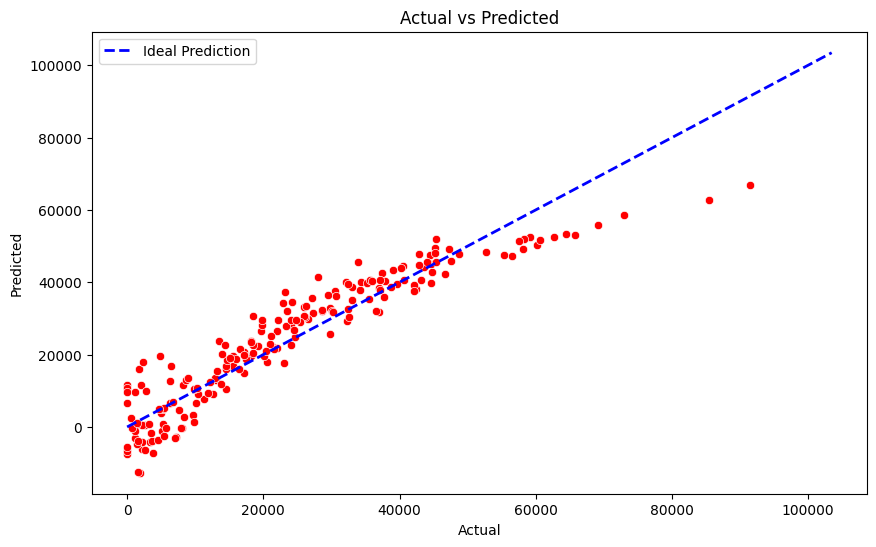

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', color='red', data=retailres)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## Random Forest Regressor

In [ ]:
retailrandom = RandomForestRegressor(n_estimators=100, random_state=42)
retailrandom.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = retailrandom.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 2625.4903498333324
Mean Squared Error: 12430858.77642011
Root Mean Squared Error: 3525.7423014764013
R-squared: 0.963474135381814


## Decision Tree Regressor

In [ ]:
retaildecision = DecisionTreeRegressor(random_state=42)
retaildecision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = retaildecision.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 3517.4747500000003
Mean Squared Error: 22071611.447156496
Root Mean Squared Error: 4698.043363694773
R-squared: 0.9351465006461758


## XGBoost Regressor

In [ ]:
retailxgb = xgb.XGBRegressor(n_estimators=500, random_state=42)
retailxgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = retailxgb.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 2482.408414154053
Mean Squared Error: 10014037.60504496
Root Mean Squared Error: 3164.4964220306774
R-squared: 0.9705755339657529


## Lasso Regression

In [ ]:
retaillasso = Lasso(alpha=0.08, max_iter= 200)
retaillasso.fit(X_train, y_train)

Lasso(alpha=0.08, max_iter=200)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', retaillasso.score(X_test, y_test))

Mean Squared Error: 10014037.60504496
Mean Absolute Error: 2482.408414154053
R-squared: 0.8714007092825272


In [ ]:
retailridge = RidgeCV(alphas=[0.1, 1, 1, 10.0])
retailridge.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 1, 1, 10.0])

## Ridge Regression

In [ ]:
y_pred = retailridge.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', retailridge.score(X_test, y_test))

Mean Squared Error: 43744080.18516979
Mean Absolute Error: 5164.7971797076
R-squared: 0.8714658110571247


## MLP Regressor

In [ ]:
retailmlp = MLPRegressor(hidden_layer_sizes=(200, 50), learning_rate = 'constant',
                         activation='relu', shuffle = True,solver='adam', random_state=42)
retailmlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 50), random_state=42)

In [ ]:
y_pred = retailmlp.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', retailmlp.score(X_test, y_test))

Mean Squared Error: 53773283.44037949
Mean Absolute Error: 5315.033926410498
R-squared: 0.8419967834608225


## Logistic Regression

In [ ]:
X = retail[['Hour', 'Footfall', 'Discount', 'Temperature', 'Units', 'PricePerUnit', 'Sales']]
y = retail['Promo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
retaillog = LogisticRegression()
retaillog.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = retaillog.predict(X_test)

In [ ]:
print('Accuracy Score :', accuracy_score(y_test, y_pred)* 100)

Accuracy Score : 76.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       147
           1       0.56      0.45      0.50        53

    accuracy                           0.76       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.75      0.76      0.75       200



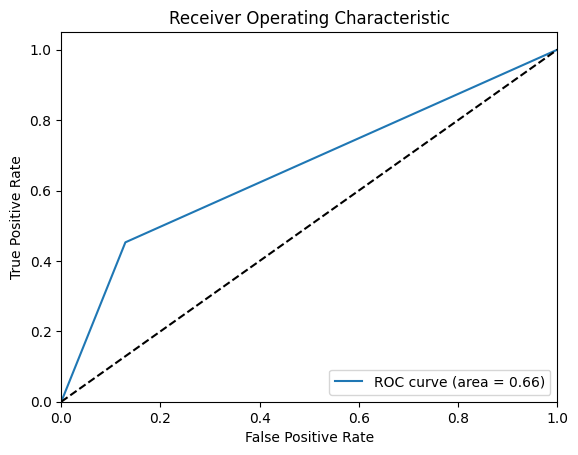

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
retailcm = confusion_matrix(y_test, y_pred)

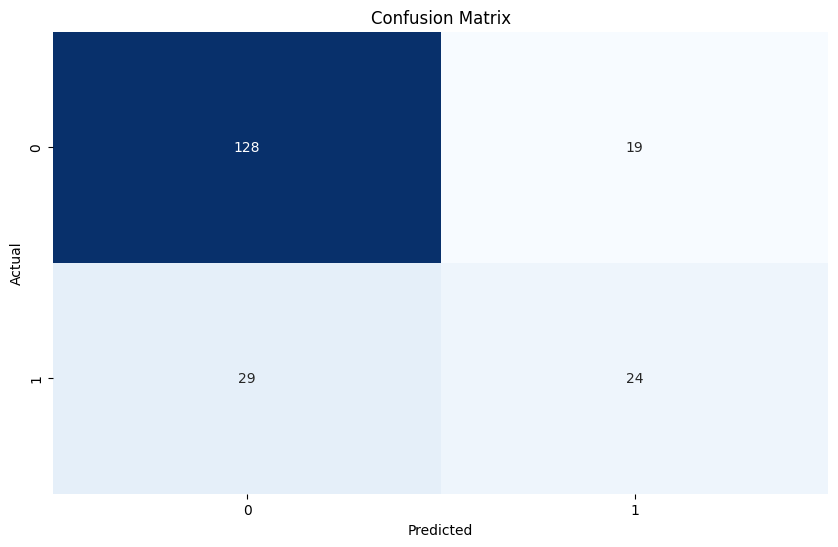

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(retailcm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()